<a href="https://colab.research.google.com/github/leupimik/fishapp_modeltraining/blob/main/ML_Modell_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import der einzelnen Bibliotheken

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [22]:
local_zip = "/content/gdrive/MyDrive/Daten_Images/Species.zip"

In [18]:
PATH = os.path.join(os.path.dirname(local_zip), 'Species')

In [19]:
train_dir = os.path.join(PATH, 'Training_Set')
validation_dir = os.path.join(PATH, 'Test_Set')

In [45]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

In [46]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 3454 files belonging to 20 classes.


In [47]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 11 files belonging to 20 classes.


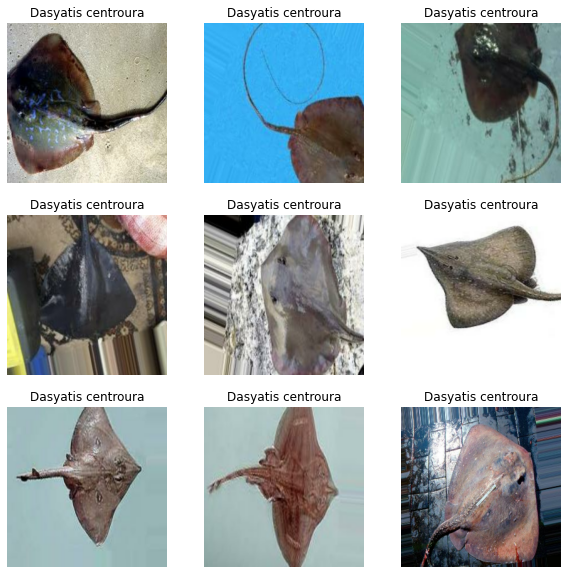

In [27]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [48]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(train_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(validation_dataset))

Number of validation batches: 108
Number of test batches: 1


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)